___
# Project:10-Agricultural Predictions
___

In [578]:
# importing project dependencies:

# compute dependency
import numpy as np
# dataframe dependency
import pandas as pd
# visualization dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import chart_studio.plotly as py #For World Map
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.express as px
# stats dependency
from scipy import stats
# feature_engineering dependency
import feature_engine
# from scraping some data
import webbrowser
import wikipedia

import warnings
warnings.filterwarnings('ignore')

In [579]:
# importing in the training dataset
train_df = pd.read_excel('train_agriculture.xlsx')

In [580]:
# importing the test dataset
test_df = pd.read_excel('test_agriculture.xlsx')

In [581]:
train_df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [582]:
test_df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [583]:
# shape
train_df.shape

(4599, 10)

In [584]:
test_df.shape

(1199, 9)

In [585]:
# let's combine tose 2 datasets from preprocessing.
df = train_df.append(test_df)

In [586]:
df.shape

(5798, 10)

In [587]:
# head of the dataframe
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0.0
1,F00000003,209,1,0,1,0,0.0,0,2,1.0
2,F00000004,257,1,0,1,0,0.0,0,2,1.0
3,F00000005,257,1,1,1,0,0.0,0,2,1.0
4,F00000006,342,1,0,1,0,0.0,0,2,1.0


In [588]:
# get the shape of the dataset
df.shape

(5798, 10)

In [589]:
# description of the dataset
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5237.000000,5798.000000,5798.000000,4599.000000
mean,1347.643153,0.218524,0.472232,2.304243,26.493618,28.920374,8.760262,1.891687,0.194390
std,821.330403,0.413280,0.499271,0.484594,15.655508,12.625594,9.582781,0.692997,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1132.000000,0.000000,0.000000,2.000000,20.000000,28.000000,6.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,15.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [590]:
# information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5798 entries, 0 to 1198
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       5798 non-null   object 
 1   Estimated_Insects_Count  5798 non-null   int64  
 2   Crop_Type                5798 non-null   int64  
 3   Soil_Type                5798 non-null   int64  
 4   Pesticide_Use_Category   5798 non-null   int64  
 5   Number_Doses_Week        5798 non-null   int64  
 6   Number_Weeks_Used        5237 non-null   float64
 7   Number_Weeks_Quit        5798 non-null   int64  
 8   Season                   5798 non-null   int64  
 9   Crop_Damage              4599 non-null   float64
dtypes: float64(2), int64(7), object(1)
memory usage: 498.3+ KB


* The dataset containes all the features in numerical value, except for the ID feature (which will be reoved by the way).

In [591]:
## Check for the missing values in the dataset

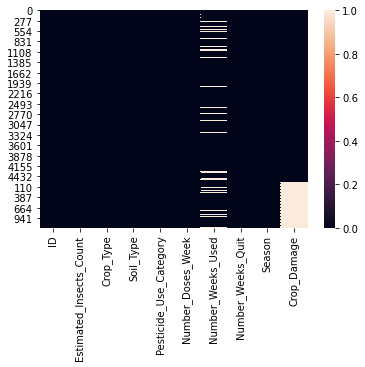

In [592]:
# plotting the heatmap is the best way to visualize missing value there is!
sns.heatmap(df.isna())

In [593]:
# now actuall stats
df.isna().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used           561
Number_Weeks_Quit             0
Season                        0
Crop_Damage                1199
dtype: int64

In [594]:
# percentage of missing values per dataset
df.isna().mean()

ID                         0.000000
Estimated_Insects_Count    0.000000
Crop_Type                  0.000000
Soil_Type                  0.000000
Pesticide_Use_Category     0.000000
Number_Doses_Week          0.000000
Number_Weeks_Used          0.096758
Number_Weeks_Quit          0.000000
Season                     0.000000
Crop_Damage                0.206795
dtype: float64

In [595]:
# check for the correlation between the features of the dataset.
df.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.024004,-0.190848,-0.015056,-0.122206,0.464096,0.228822,-0.002287,0.202312
Crop_Type,-0.024004,1.000000,-0.127340,0.373412,-0.164966,0.011204,-0.290973,0.003754,0.021772
Soil_Type,-0.190848,-0.127340,1.000000,0.044193,0.051543,-0.108561,-0.062686,-0.005204,-0.059481
Pesticide_Use_Category,-0.015056,0.373412,0.044193,1.000000,-0.006929,0.396223,-0.574041,0.009279,0.199195
Number_Doses_Week,-0.122206,-0.164966,0.051543,-0.006929,1.000000,0.109537,-0.024209,0.002751,-0.018363
Number_Weeks_Used,0.464096,0.011204,-0.108561,0.396223,0.109537,1.000000,-0.448672,-0.004887,0.244988
Number_Weeks_Quit,0.228822,-0.290973,-0.062686,-0.574041,-0.024209,-0.448672,1.000000,0.010324,-0.152918
Season,-0.002287,0.003754,-0.005204,0.009279,0.002751,-0.004887,0.010324,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.244988,-0.152918,-0.016196,1.000000


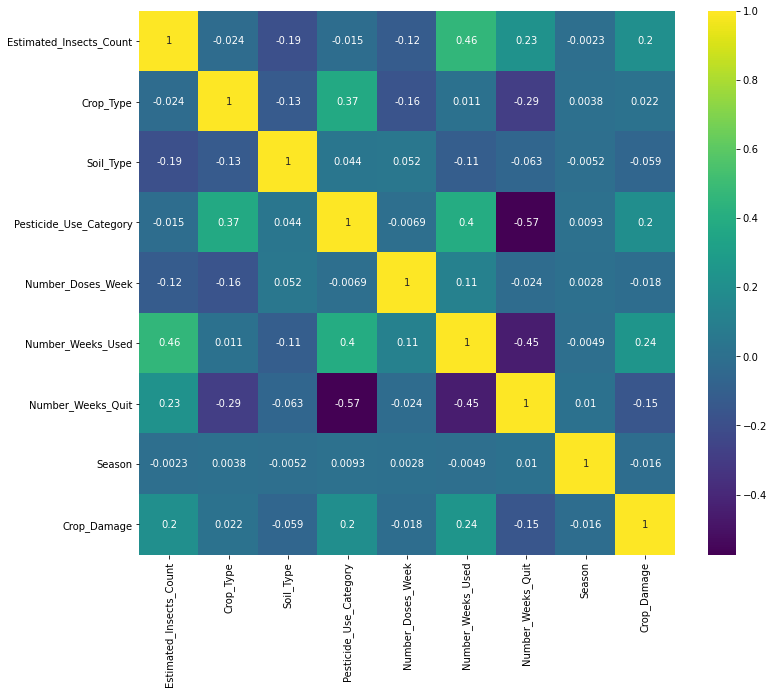

In [596]:
# bring up the heat..map
plt.figure(figsize=(12,10))

sns.heatmap(df.corr(),annot=True,cmap='viridis')

Initial Infereces:
    * There are around 4.6K of samples in the train dataset and 1199 examples in the test dataset.
    * There are 9 features in totals and 1 target column
    * The target column is Crop_Damage.
    * Thus, the goal of the dataset is to predict if the crop will damaged or not.
    * There is only 1 column in the dataset which contains around 440 mising values 
    * There are no extremely highly correlated features in the dataset.

## Univariate Analysis

In [597]:
# let's crate a coppy of the raw dataframe for some mappings in visualizations.
df_viz = df.copy()

In [598]:
# helper function
def fig_this_size(x,y):
    return plt.figure(figsize=(x,y))

In [599]:
df_viz.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0.0
1,F00000003,209,1,0,1,0,0.0,0,2,1.0
2,F00000004,257,1,0,1,0,0.0,0,2,1.0
3,F00000005,257,1,1,1,0,0.0,0,2,1.0
4,F00000006,342,1,0,1,0,0.0,0,2,1.0


In [600]:
# Estimated_Insects_Counts

* There is a real value which gives the count of insects per sq.m.

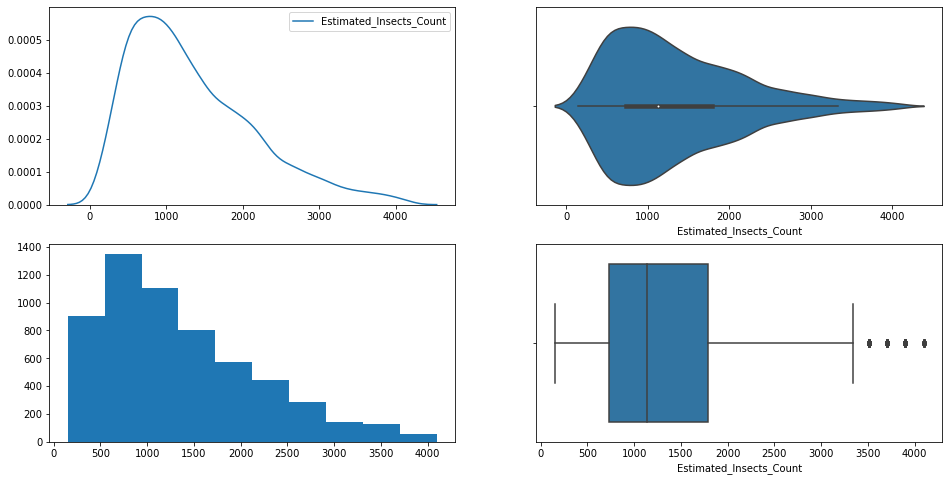

In [601]:
fig = fig_this_size(16,8)

fig.add_subplot(221)
sns.kdeplot(df_viz.Estimated_Insects_Count)

fig.add_subplot(222)
sns.violinplot(df_viz.Estimated_Insects_Count,orient='h')

fig.add_subplot(223)
plt.hist(df_viz.Estimated_Insects_Count)

fig.add_subplot(224)
sns.boxplot(df_viz.Estimated_Insects_Count)

In [602]:
df_viz.Estimated_Insects_Count.describe()

count    5798.000000
mean     1347.643153
std       821.330403
min       150.000000
25%       731.000000
50%      1132.000000
75%      1786.000000
max      4097.000000
Name: Estimated_Insects_Count, dtype: float64

* Estimated_Insects_Count per square meter of area are around follow a sightly positively skewed normal distribution
* The more the number of insects the more chances of the crop being damaged. 

In [603]:
# let's check the regions with highest count of insects
df_viz.sort_values('Estimated_Insects_Count',ascending=False)[:500]['Crop_Damage'].value_counts()

0.0    243
1.0    124
2.0     18
Name: Crop_Damage, dtype: int64

In [604]:
# Crop type

* This feature gives the category of the crop.
* We have to types of crops, thus this is a binary type feature.

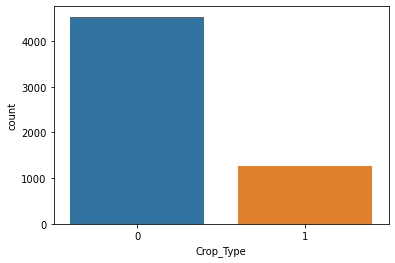

In [605]:
sns.countplot(df_viz.Crop_Type)

* We have to types of crop in this dataset.
* There are higher number of type 0 crops than type 1 crops

In [606]:
df_viz[df_viz.Crop_Type == 0]['Crop_Damage'].value_counts()

0.0    2979
1.0     498
2.0      88
Name: Crop_Damage, dtype: int64

In [607]:
# # Soil_type

* There are 2 types of soil , thus this a binary value.

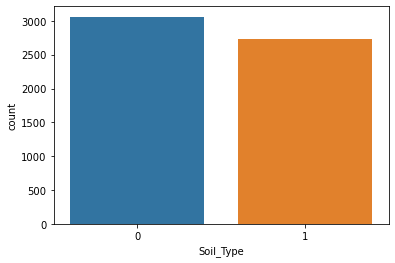

In [608]:
sns.countplot(df.Soil_Type)

* This is a pretty balanced feature.

In [609]:
# Pesticides_Use_Category

In [610]:
# mapping the respective values.
df_viz.Pesticide_Use_Category = df_viz.Pesticide_Use_Category.map({1:'Never_Used',2:'Previously_Used',3:'Currently Using'})

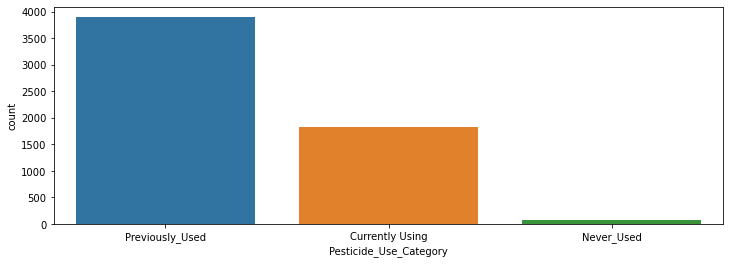

In [611]:
fig_this_size(12,4)
sns.countplot(df_viz.Pesticide_Use_Category,order=df_viz.Pesticide_Use_Category.value_counts().index)

* Most of the Agricultural Practioners used their previously used Pesticides for their practices.

In [612]:
# Number of Doses Per Week

* Number of doeses of pesticides given to the crops in a weeks interval.
* A real value feature type.

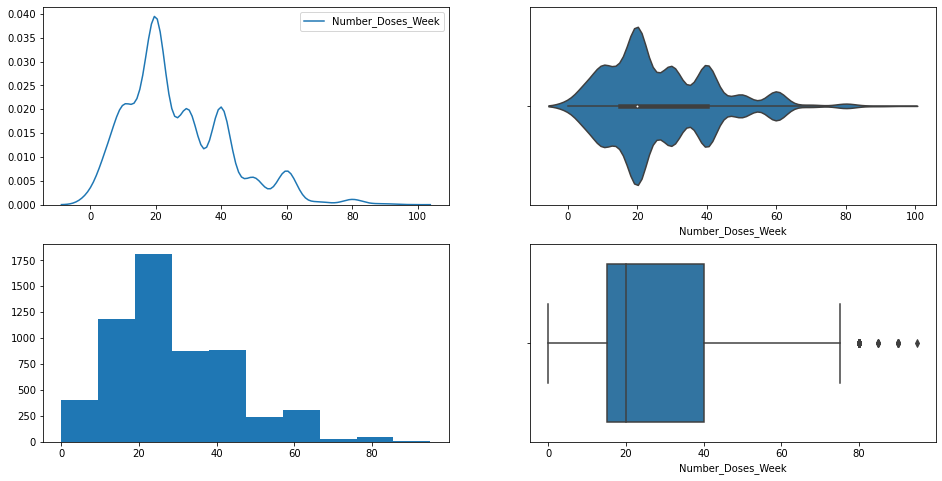

In [613]:
fig = fig_this_size(16,8)

fig.add_subplot(221)
sns.kdeplot(df_viz.Number_Doses_Week)

fig.add_subplot(222)
sns.violinplot(df_viz.Number_Doses_Week,orient='h')

fig.add_subplot(223)
plt.hist(df_viz.Number_Doses_Week)

fig.add_subplot(224)
sns.boxplot(df_viz.Number_Doses_Week)

In [614]:
df.Number_Doses_Week.describe()

count    5798.000000
mean       26.493618
std        15.655508
min         0.000000
25%        15.000000
50%        20.000000
75%        40.000000
max        95.000000
Name: Number_Doses_Week, dtype: float64

In [615]:
stats.entropy(df.Number_Doses_Week)

8.493505574541409

In [616]:
stats.skew(df.Number_Doses_Week)

0.9292115326061452

In [617]:
stats.kurtosis(df.Number_Doses_Week)

0.8104624246637764

* Some outliers in the features are streching the knew of the feature.
* Has a more of a distorted disrtibution.

In [618]:
# Number of Weeks Used

* A count of total number of weeks the plant is injected/sprayed with the pesticide.

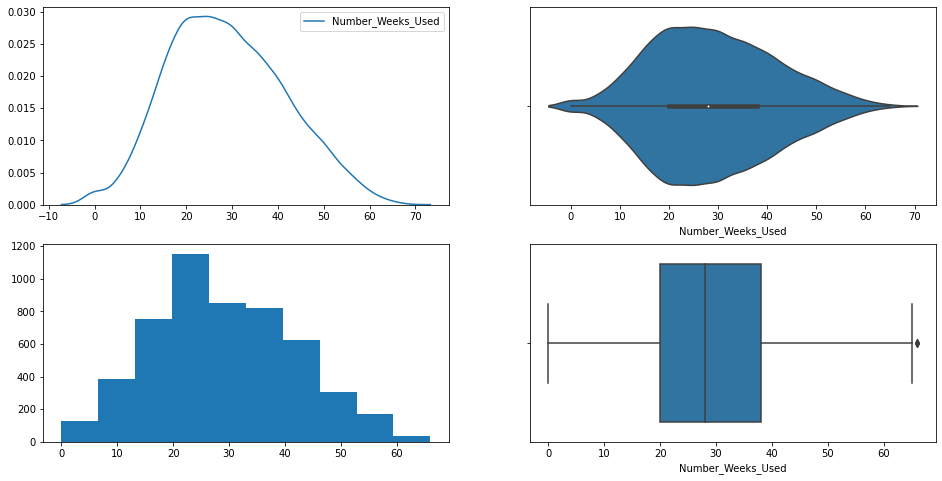

In [619]:
fig = fig_this_size(16,8)

fig.add_subplot(221)
sns.kdeplot(df_viz.Number_Weeks_Used)

fig.add_subplot(222)
sns.violinplot(df_viz.Number_Weeks_Used,orient='h')

fig.add_subplot(223)
plt.hist(df_viz.Number_Weeks_Used)

fig.add_subplot(224)
sns.boxplot(df_viz.Number_Weeks_Used)

* One of the best feature you we say in this dataset so far.
* No outliers, follows a normal distribution.

In [620]:
# Number of weeks quit

* The count of number of weeks the crop isn't sprayed/injected with pesticide.

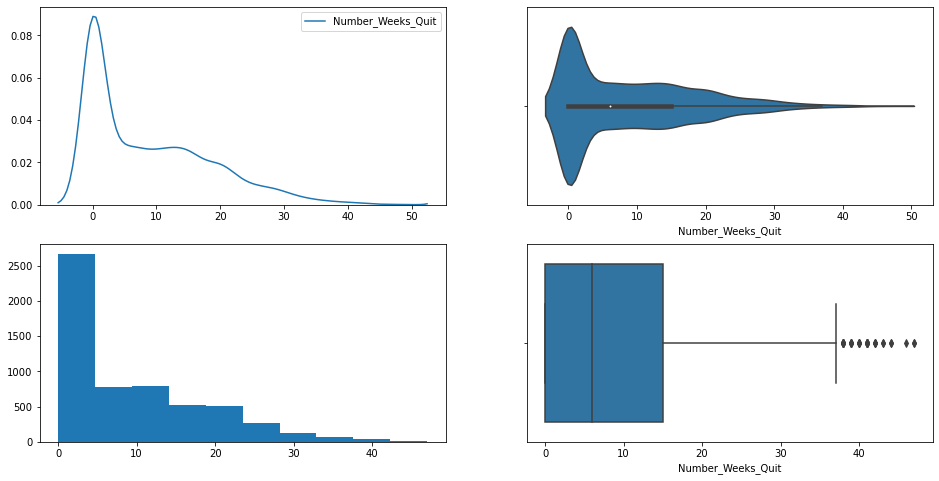

In [621]:
fig = fig_this_size(16,8)

fig.add_subplot(221)
sns.kdeplot(df_viz.Number_Weeks_Quit)

fig.add_subplot(222)
sns.violinplot(df_viz.Number_Weeks_Quit,orient='h')

fig.add_subplot(223)
plt.hist(df_viz.Number_Weeks_Quit)

fig.add_subplot(224)
sns.boxplot(df_viz.Number_Weeks_Quit)

In [622]:
df.Number_Weeks_Quit.value_counts()[:5]/len(df)*100

0     35.098310
2      3.052777
6      2.949293
12     2.932046
14     2.845809
Name: Number_Weeks_Quit, dtype: float64

* Highly skewed distribution
* 32 percent of the total values are 0.

In [623]:
# Seasons

* The 3 seasons in which crops are grown.
* The three seasons are:
    * 1: Autumn
    * 2: Winter
    * 3: Summer

In [624]:
# mapping the data for more interpretable visualzation:
df_viz.Season = df_viz.Season.map({1: 'Autumn', 2: 'Winter', 3: 'Summer'})

In [625]:
df_viz.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,Never_Used,0,0.0,0,Autumn,0.0
1,F00000003,209,1,0,Never_Used,0,0.0,0,Winter,1.0
2,F00000004,257,1,0,Never_Used,0,0.0,0,Winter,1.0
3,F00000005,257,1,1,Never_Used,0,0.0,0,Winter,1.0
4,F00000006,342,1,0,Never_Used,0,0.0,0,Winter,1.0


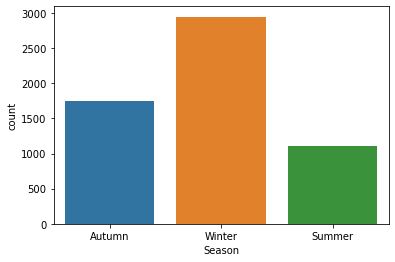

In [626]:
sns.countplot(df_viz.Season)

* Most of the crops are grown in the Winer Season.

In [627]:
# Crop Damage (Target Variable)

* Give the stats about if the crop is damaged or not, and If he crop is damaged, is it because of the Pesticides used or Something else.

In [628]:
df_viz.Crop_Damage = df_viz.Crop_Damage.map({0:'Alive',1:'Damage',2:'Damaged_coz_of_Pesticides'})

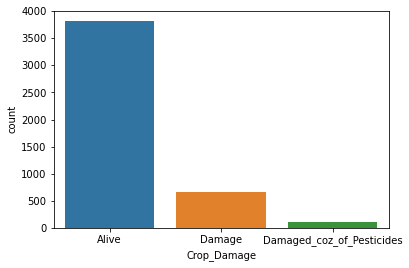

In [629]:
sns.countplot(df_viz.Crop_Damage)

In [630]:
df_viz.groupby('Crop_Damage')['Estimated_Insects_Count','Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit'].mean()

,Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
Crop_Damage,,,,
Alive,1282.352094,26.692408,27.517172,9.841885
Damage,1772.251506,24.902108,35.217687,6.558735
Damaged_coz_of_Pesticides,1678.947826,28.434783,38.894231,3.347826


* <b>Inferences:</b>
    * We can see that on average the less the insects on the crop the better it's chances of survival.
    * If the pesticide is used for more than 35 weeks, the plant is llikely to die on average.
    * If the pesticide is used for more than 38 weeks, the plant is likely to die due to pesticide overdose.

## Multi-variate Analysis

In [631]:
# Let's get a new fearture Age of the Plants

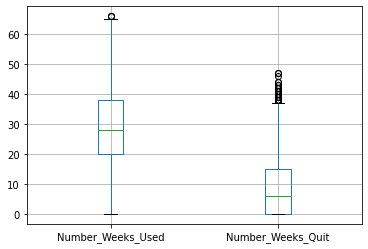

In [632]:
df[['Number_Weeks_Used','Number_Weeks_Quit']].boxplot()

In [633]:
df['Total_Weeks_Under_Dose'] = df['Number_Weeks_Quit'] + df['Number_Weeks_Used']
df_viz['Total_Weeks_Under_Dose'] = df['Total_Weeks_Under_Dose']

In [634]:
df_viz

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Total_Weeks_Under_Dose
0,F00000001,188,1,0,Never_Used,0,0.0,0,Autumn,Alive,0.0
1,F00000003,209,1,0,Never_Used,0,0.0,0,Winter,Damage,0.0
2,F00000004,257,1,0,Never_Used,0,0.0,0,Winter,Damage,0.0
3,F00000005,257,1,1,Never_Used,0,0.0,0,Winter,Damage,0.0
4,F00000006,342,1,0,Never_Used,0,0.0,0,Winter,Damage,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,Previously_Used,40,34.0,7,Summer,NaN,41.0
1195,F00003135,1132,0,1,Previously_Used,40,25.0,3,Autumn,NaN,28.0
1196,F00003138,1132,0,1,Previously_Used,20,13.0,23,Autumn,NaN,36.0
1197,F00003149,1212,0,1,Previously_Used,10,35.0,5,Autumn,NaN,40.0


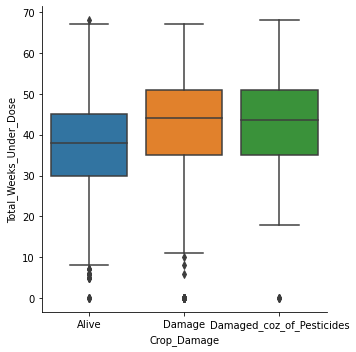

In [635]:
sns.catplot('Crop_Damage','Total_Weeks_Under_Dose',data=df_viz.dropna(),kind='box')

In [636]:
df_viz

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Total_Weeks_Under_Dose
0,F00000001,188,1,0,Never_Used,0,0.0,0,Autumn,Alive,0.0
1,F00000003,209,1,0,Never_Used,0,0.0,0,Winter,Damage,0.0
2,F00000004,257,1,0,Never_Used,0,0.0,0,Winter,Damage,0.0
3,F00000005,257,1,1,Never_Used,0,0.0,0,Winter,Damage,0.0
4,F00000006,342,1,0,Never_Used,0,0.0,0,Winter,Damage,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,Previously_Used,40,34.0,7,Summer,NaN,41.0
1195,F00003135,1132,0,1,Previously_Used,40,25.0,3,Autumn,NaN,28.0
1196,F00003138,1132,0,1,Previously_Used,20,13.0,23,Autumn,NaN,36.0
1197,F00003149,1212,0,1,Previously_Used,10,35.0,5,Autumn,NaN,40.0


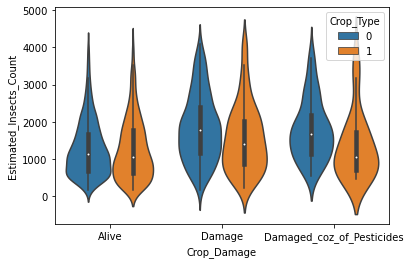

In [637]:
# crop damage vs insect count
sns.violinplot(df_viz.Crop_Damage,df_viz.Estimated_Insects_Count,hue=df_viz.Crop_Type)

* The probality for the crop to survive is higher if the Estimated Insect count is lower.

In [638]:
# Crop type vs Number of doses

* Are the doses given to the plants are according to the crop type? Let's find that out!

In [639]:
df['Total_Number_of_Doses'] = df.Number_Doses_Week * df.Number_Weeks_Used
df_viz['Total_Number_of_Doses'] = df['Total_Number_of_Doses']

In [640]:
df_viz

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Total_Weeks_Under_Dose,Total_Number_of_Doses
0,F00000001,188,1,0,Never_Used,0,0.0,0,Autumn,Alive,0.0,0.0
1,F00000003,209,1,0,Never_Used,0,0.0,0,Winter,Damage,0.0,0.0
2,F00000004,257,1,0,Never_Used,0,0.0,0,Winter,Damage,0.0,0.0
3,F00000005,257,1,1,Never_Used,0,0.0,0,Winter,Damage,0.0,0.0
4,F00000006,342,1,0,Never_Used,0,0.0,0,Winter,Damage,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,Previously_Used,40,34.0,7,Summer,NaN,41.0,1360.0
1195,F00003135,1132,0,1,Previously_Used,40,25.0,3,Autumn,NaN,28.0,1000.0
1196,F00003138,1132,0,1,Previously_Used,20,13.0,23,Autumn,NaN,36.0,260.0
1197,F00003149,1212,0,1,Previously_Used,10,35.0,5,Autumn,NaN,40.0,350.0


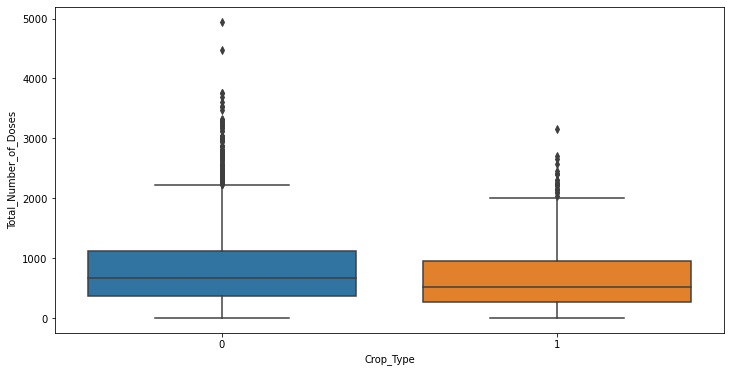

In [641]:
fig_this_size(12,6)
sns.boxplot(df.Crop_Type,df.Total_Number_of_Doses)

* The number of Doses given to the Crop type 0 are higher than type 1

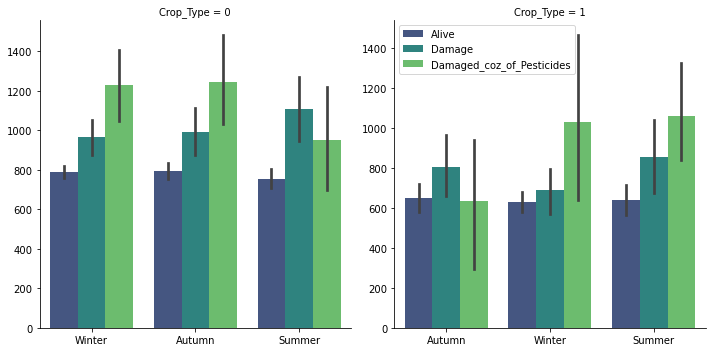

In [642]:
g = sns.FacetGrid(df_viz.dropna(),col='Crop_Type',height=5,sharex=False,sharey=False)
g.map_dataframe(sns.barplot,x='Season',y='Total_Number_of_Doses',hue='Crop_Damage',palette='viridis')
plt.legend()
plt.tight_layout()

* In the Winters, the Plant is more likely to die of excess of pesticides.
* Crop of type 0 , has the best chances of Being alive under high pesticides doses in winter.
* On Average Crop type 0 can handle around 800 doses without being damaged but Crop Type 1 can handle around 650 doeses without being damaged irrespective of the Season.

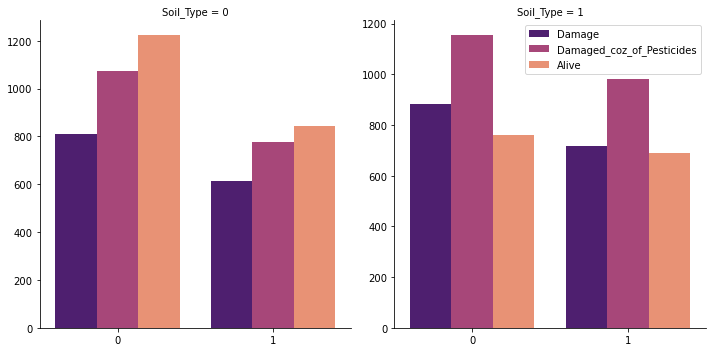

In [643]:
g = sns.FacetGrid(df_viz.dropna(),col='Soil_Type',height=5,sharex=False,sharey=False)
g.map_dataframe(sns.barplot,x='Crop_Type',y='Total_Number_of_Doses',hue='Crop_Damage',palette='magma',ci=None)
plt.legend()
plt.tight_layout()

* A crop can withstand more number of doses of pesticides if it is planted in Soil 0 rather Than Soil 1.
* Crops planted in Soild 2 will get damaged quickly with even with less number of doses, an the reason from damage would be mostly exess pesticide sprayes.

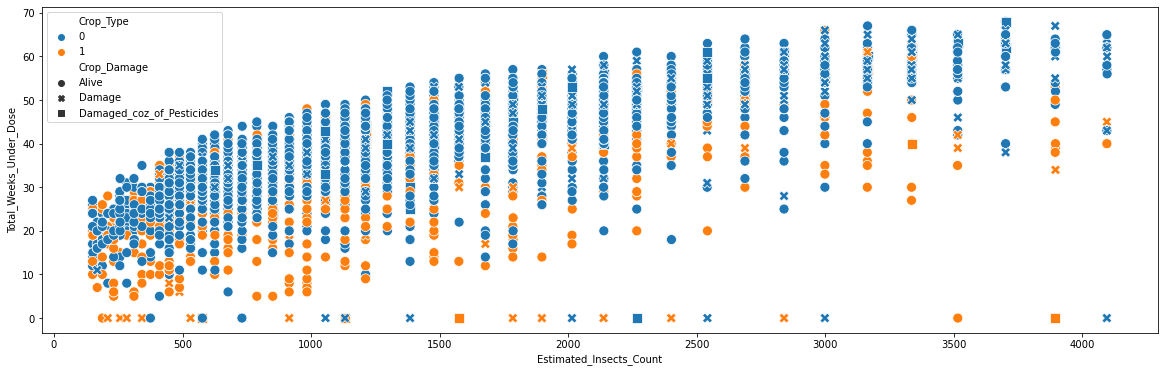

In [644]:
fig_this_size(20,6)
sns.scatterplot(df.Estimated_Insects_Count,df.Total_Weeks_Under_Dose,hue=df.Crop_Type,s=100,palette='tab10',style=df_viz.Crop_Damage)

* As the number of Instect Count Increases, the number of week under does (Weeks_used + Weeks quit) increase.
* Again we can see that The doses give to the crop type 0 is greate than type 1.
* There are also some plants to whom doses were never given, most of them did'nt make it alive.

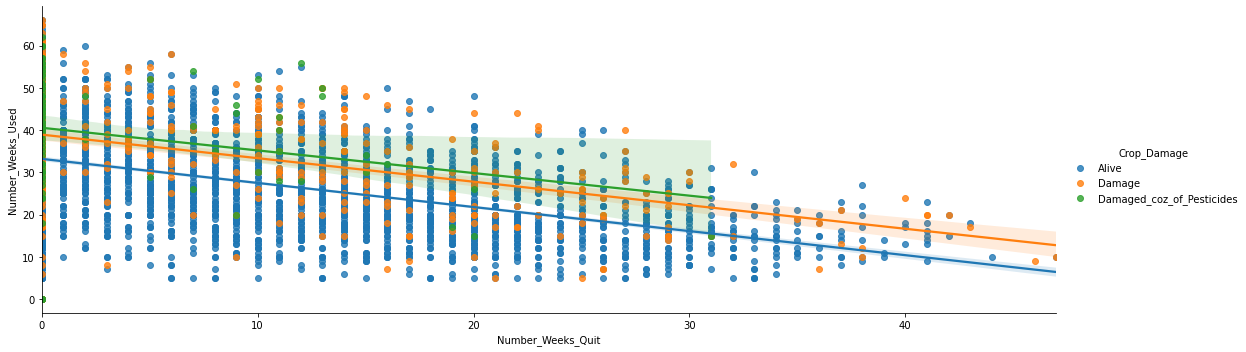

In [645]:
sns.lmplot('Number_Weeks_Quit','Number_Weeks_Used',data=df_viz,aspect=3,hue='Crop_Damage')

In [646]:
df_viz.Pesticide_Use_Category.value_counts()

Previously_Used    3900
Currently Using    1831
Never_Used           67
Name: Pesticide_Use_Category, dtype: int64

## Imputing the missing values

In [647]:
# creating another copy to modify the data and to train the model.
df_cleaned = df.copy()

In [648]:
df.isna().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used           561
Number_Weeks_Quit             0
Season                        0
Crop_Damage                1199
Total_Weeks_Under_Dose      561
Total_Number_of_Doses       561
dtype: int64

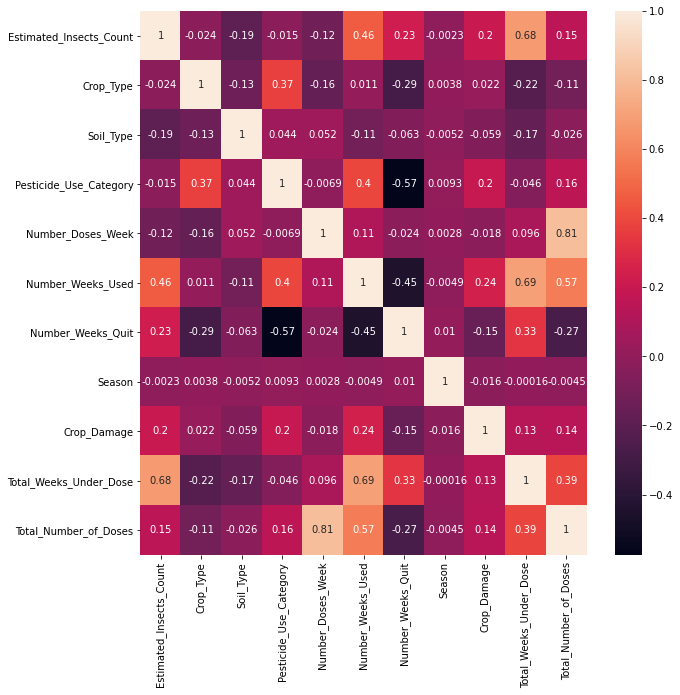

In [649]:
fig_this_size(10,10)
sns.heatmap(df.corr(),annot=True)

* There is 1 raw feature with missing values and 2 derived features with missing value.

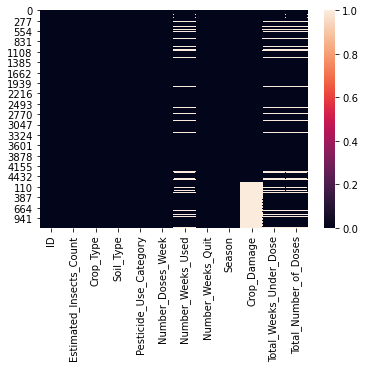

In [650]:
sns.heatmap(df.isna())

In [651]:
df.isna().mean()

ID                         0.000000
Estimated_Insects_Count    0.000000
Crop_Type                  0.000000
Soil_Type                  0.000000
Pesticide_Use_Category     0.000000
Number_Doses_Week          0.000000
Number_Weeks_Used          0.096758
Number_Weeks_Quit          0.000000
Season                     0.000000
Crop_Damage                0.206795
Total_Weeks_Under_Dose     0.096758
Total_Number_of_Doses      0.096758
dtype: float64

* Missing values are around 10 percent in the dataset per feature.

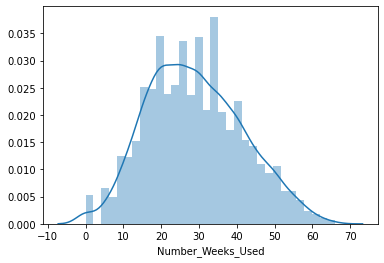

In [652]:
sns.distplot(df.Number_Weeks_Used)

In [653]:
from feature_engine.missing_data_imputers import EndTailImputer,RandomSampleImputer,MeanMedianImputer

In [654]:
imputing_methods = [EndTailImputer,RandomSampleImputer,MeanMedianImputer]

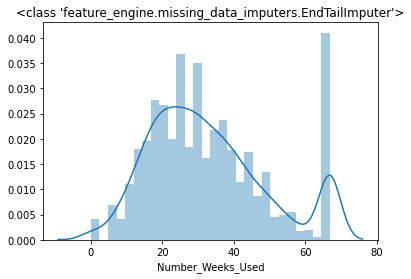

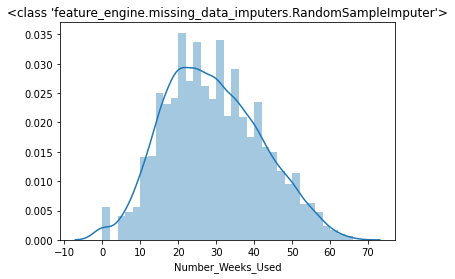

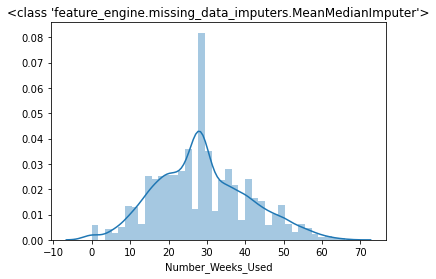

In [655]:
for method in imputing_methods:
    use_method = method(variables=['Number_Weeks_Used'])
    
    sns.distplot(use_method.fit_transform(df_cleaned)['Number_Weeks_Used'])
    plt.title(method)
    plt.show()

* We can see that the random sample imputer is giving us the best results, so let's finalize it as the imputation method

In [656]:
missing_features_list = []
for col in df_cleaned:
    if any(df[col].isna()) == True:
        missing_features_list.append(col)

In [657]:
missing_features_list

['Number_Weeks_Used',
 'Crop_Damage',
 'Total_Weeks_Under_Dose',
 'Total_Number_of_Doses']

In [658]:
df.isna().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used           561
Number_Weeks_Quit             0
Season                        0
Crop_Damage                1199
Total_Weeks_Under_Dose      561
Total_Number_of_Doses       561
dtype: int64

* Remove the crop damage column from the mising columns list as those are the test test samples.

In [659]:
missing_features_list.remove('Crop_Damage')

In [660]:
missing_features_list

['Number_Weeks_Used', 'Total_Weeks_Under_Dose', 'Total_Number_of_Doses']

In [661]:
imputer = RandomSampleImputer(variables=missing_features_list)

In [662]:
df_cleaned = imputer.fit_transform(df_cleaned)

In [663]:
# sanity check!

In [664]:
df_cleaned.isna().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used             0
Number_Weeks_Quit             0
Season                        0
Crop_Damage                1199
Total_Weeks_Under_Dose        0
Total_Number_of_Doses         0
dtype: int64

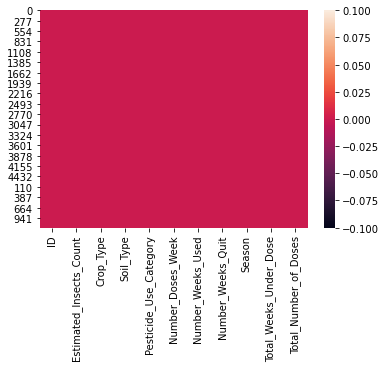

In [665]:
sns.heatmap(df_cleaned.drop('Crop_Damage',1).isna())

In [666]:
# Let's remove the ID column as it is a redundant column.
df_cleaned.drop('ID',1,inplace=True)

In [667]:
df_cleaned

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Total_Weeks_Under_Dose,Total_Number_of_Doses
0,188,1,0,1,0,0.0,0,1,0.0,0.0,0.0
1,209,1,0,1,0,0.0,0,2,1.0,0.0,0.0
2,257,1,0,1,0,0.0,0,2,1.0,0.0,0.0
3,257,1,1,1,0,0.0,0,2,1.0,0.0,0.0
4,342,1,0,1,0,0.0,0,2,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1194,1132,0,1,2,40,34.0,7,3,NaN,41.0,1360.0
1195,1132,0,1,2,40,25.0,3,1,NaN,28.0,1000.0
1196,1132,0,1,2,20,13.0,23,1,NaN,36.0,260.0
1197,1212,0,1,2,10,35.0,5,1,NaN,40.0,350.0


## Removing the outliers

In [668]:
# before removing the outliers will will resplit the dataset,
df_cleaned_train = df_cleaned[~df_cleaned.Crop_Damage.isna()].copy()
test_df = df_cleaned[df_cleaned.Crop_Damage.isna()]

In [669]:
df_cleaned_train.shape,test_df.shape

((4599, 11), (1199, 11))

In [670]:
df_cleaned = df_cleaned_train

In [ ]:
# checking for outliers:

In [671]:
# finding the numerical and the categorical features and putting them indifferent lists.
num_feat,cat_feat = [],[]
for col in df_cleaned:
    
    if len(df_cleaned[col].value_counts()) > 4:
        
        num_feat.append(col)
    else:
        cat_feat.append(col)

In [672]:
num_feat

['Estimated_Insects_Count',
 'Number_Doses_Week',
 'Number_Weeks_Used',
 'Number_Weeks_Quit',
 'Total_Weeks_Under_Dose',
 'Total_Number_of_Doses']

In [673]:
cat_feat

['Crop_Type', 'Soil_Type', 'Pesticide_Use_Category', 'Season', 'Crop_Damage']

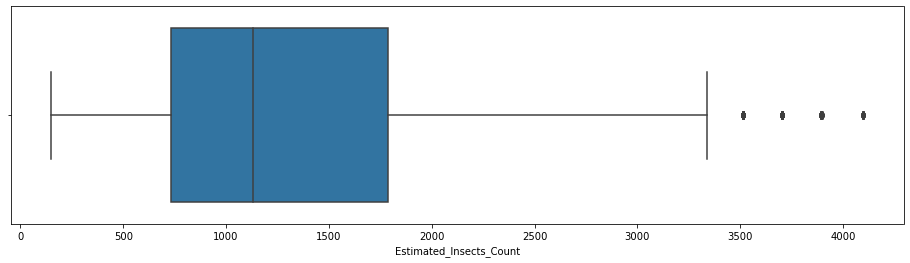

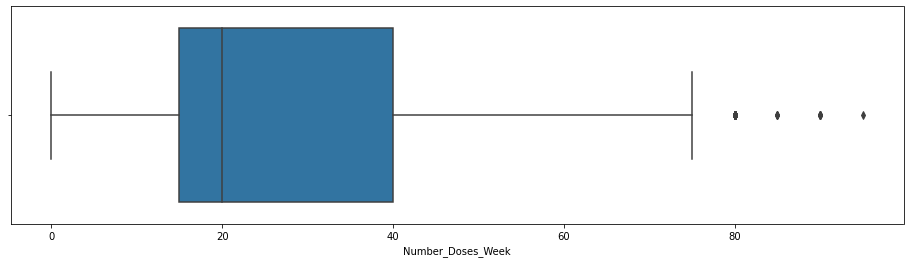

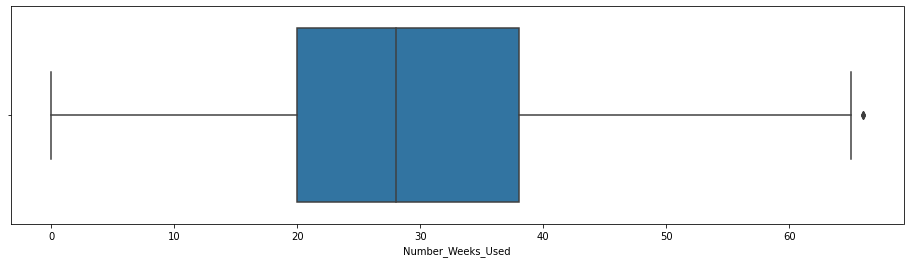

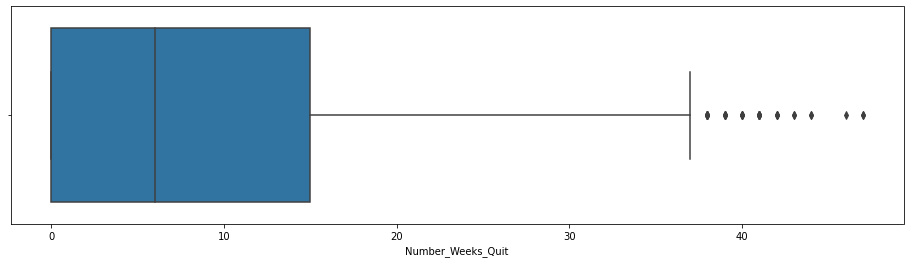

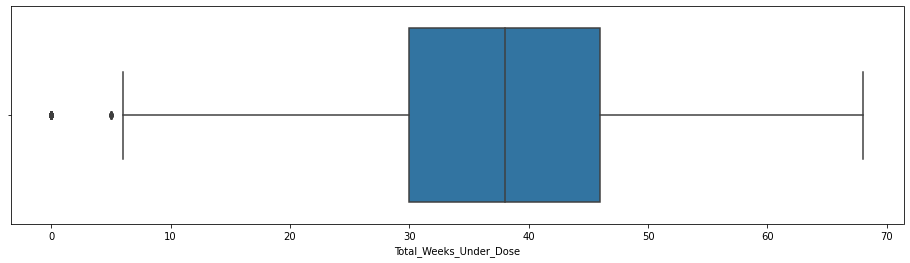

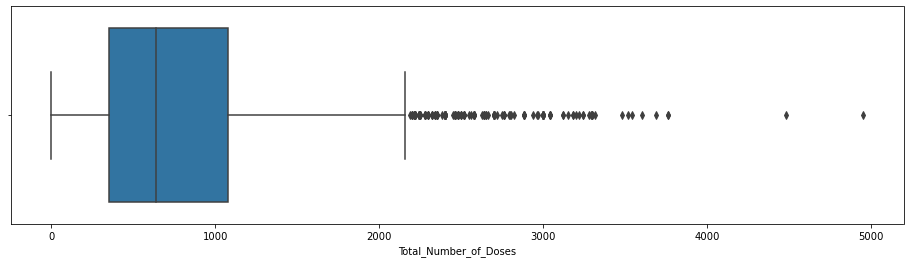

In [674]:
for col in num_feat:
    fig_this_size(16,4)
    sns.boxplot(df[col])

In [675]:
# addressing the outliers using z score

In [676]:
z_scores = stats.zscore(df_cleaned)

abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 3).all(axis=1)

df_cleaned = df_cleaned[filtered_entries]

In [677]:
len(df_cleaned)

4296

In [678]:
len(df)

5798

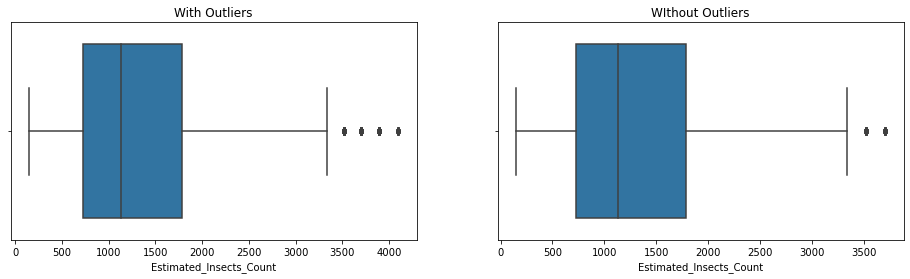

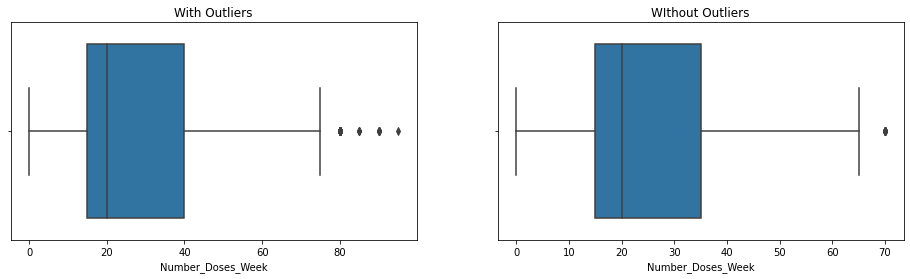

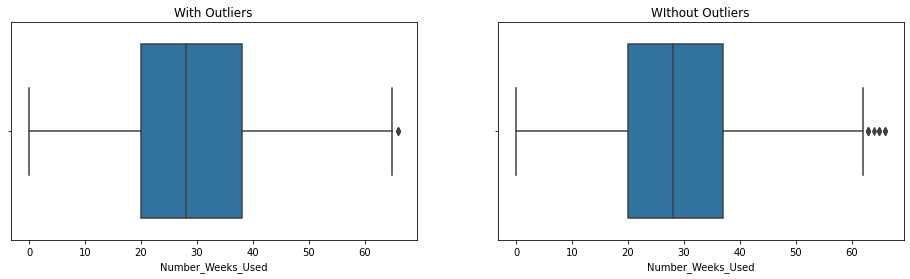

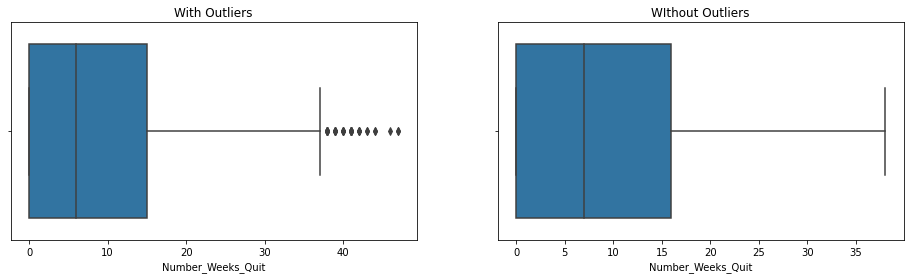

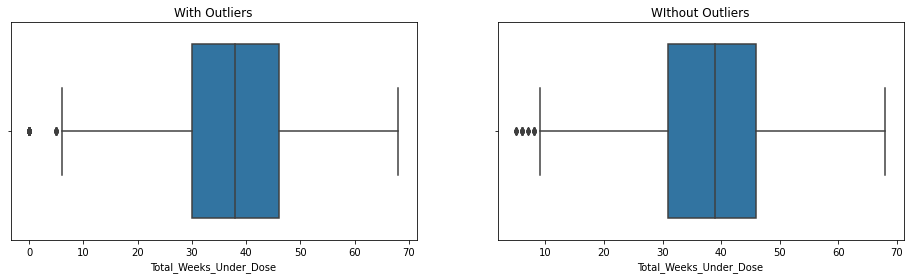

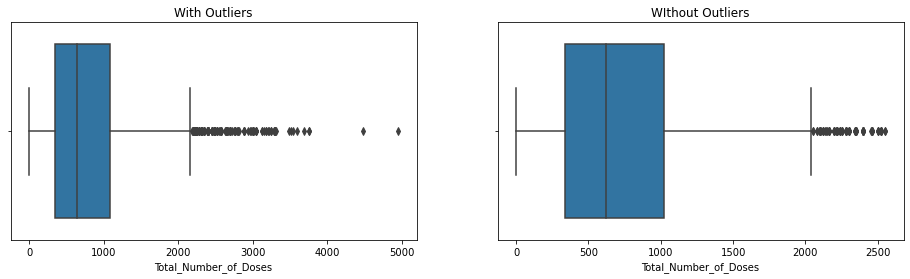

In [679]:
#outliers : before and after
for col in num_feat:
    
    fig = fig_this_size(16,4)
        
    fig.add_subplot(121)
    sns.boxplot(df[col])
    plt.title('With Outliers')
        
    fig.add_subplot(122)
    sns.boxplot(df_cleaned[col])
    plt.title('WIthout Outliers')

## Skewness of the data

In [680]:
df_cleaned

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Total_Weeks_Under_Dose,Total_Number_of_Doses
5,448,0,1,1,0,46.0,0,2,1.0,36.0,1720.0
6,448,0,1,1,0,35.0,0,2,1.0,40.0,1200.0
10,1212,1,0,1,0,21.0,0,3,0.0,58.0,950.0
17,2401,0,1,1,0,12.0,0,1,1.0,40.0,250.0
24,150,0,0,3,30,26.0,0,2,0.0,26.0,780.0
...,...,...,...,...,...,...,...,...,...,...,...
4594,2138,0,1,2,20,25.0,1,1,1.0,42.0,800.0
4595,2139,0,1,2,30,47.0,2,1,1.0,49.0,1410.0
4596,2267,0,1,2,10,7.0,27,2,0.0,34.0,70.0
4597,2267,0,1,2,10,20.0,24,2,0.0,44.0,200.0


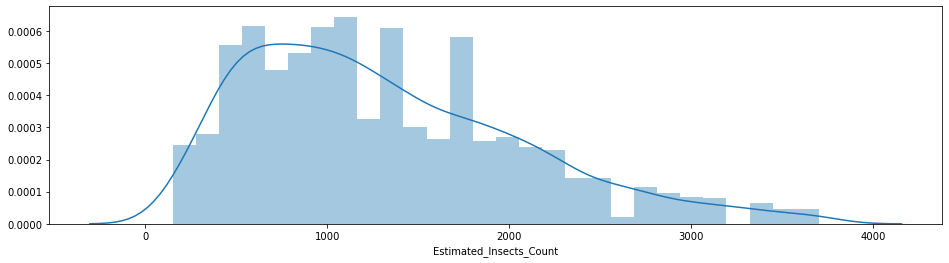

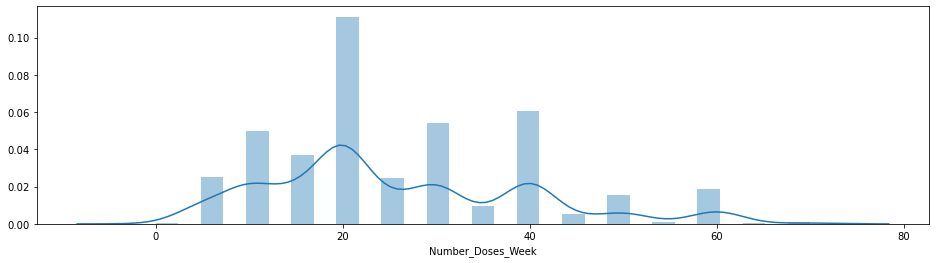

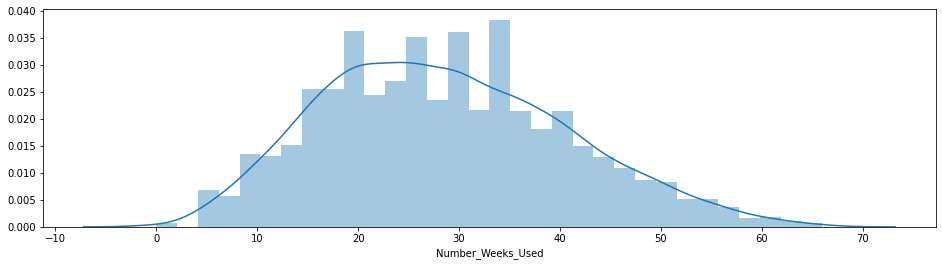

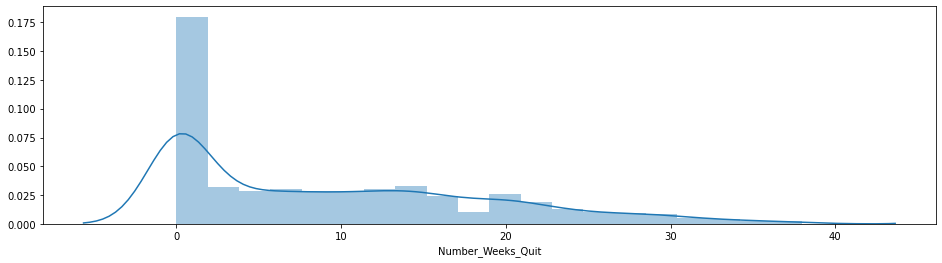

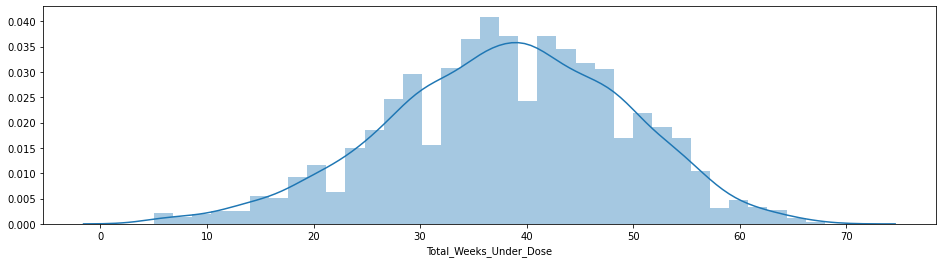

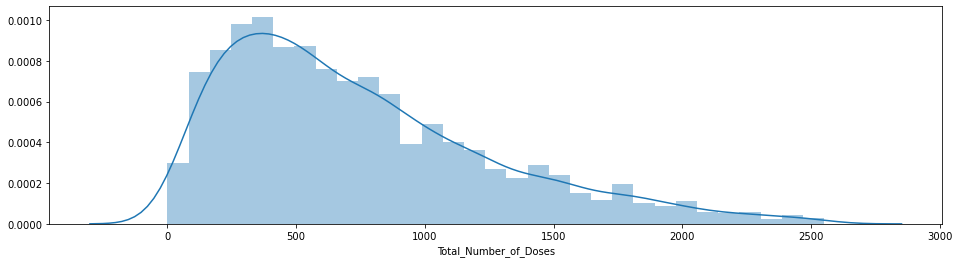

In [681]:
for col in num_feat:
    fig_this_size(16,4)
    sns.distplot(df_cleaned[col])

In [682]:
# skew stats:
df_cleaned[num_feat].skew()

Estimated_Insects_Count    0.802977
Number_Doses_Week          0.726959
Number_Weeks_Used          0.350930
Number_Weeks_Quit          0.796677
Total_Weeks_Under_Dose    -0.218454
Total_Number_of_Doses      1.000715
dtype: float64

In [683]:
# transforation

In [684]:
#try1: log transformation
np.log(df_cleaned[num_feat]+1).skew()

Estimated_Insects_Count   -0.534459
Number_Doses_Week         -0.634313
Number_Weeks_Used         -1.140373
Number_Weeks_Quit         -0.251580
Total_Weeks_Under_Dose    -1.443360
Total_Number_of_Doses     -1.340978
dtype: float64

In [685]:
#try2 : Sqrt transformation
np.sqrt(df_cleaned[num_feat]).skew()

Estimated_Insects_Count    0.189919
Number_Doses_Week          0.085987
Number_Weeks_Used         -0.262480
Number_Weeks_Quit         -0.008866
Total_Weeks_Under_Dose    -0.746466
Total_Number_of_Doses      0.239606
dtype: float64

In [686]:
# square transformationsis working just fine
# let's finalize that.

In [687]:
df_cleaned[num_feat] = np.sqrt(df_cleaned[num_feat])

In [688]:
# before and after : skewness

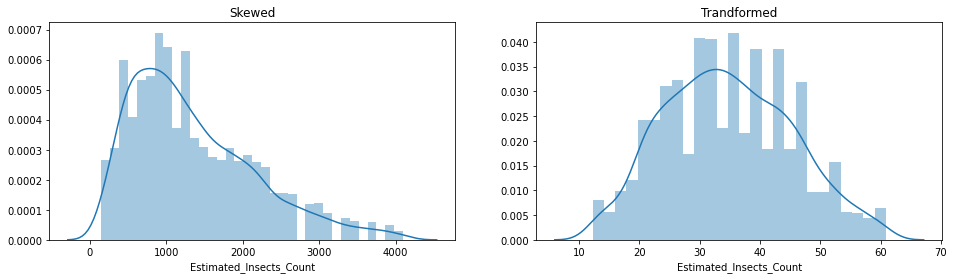

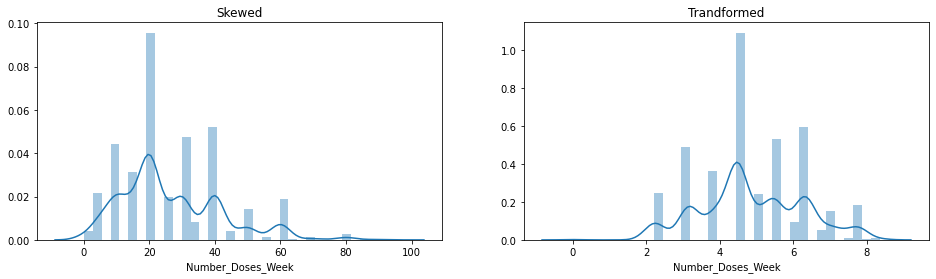

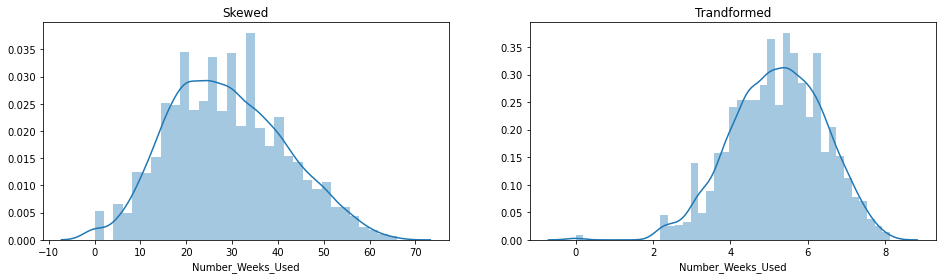

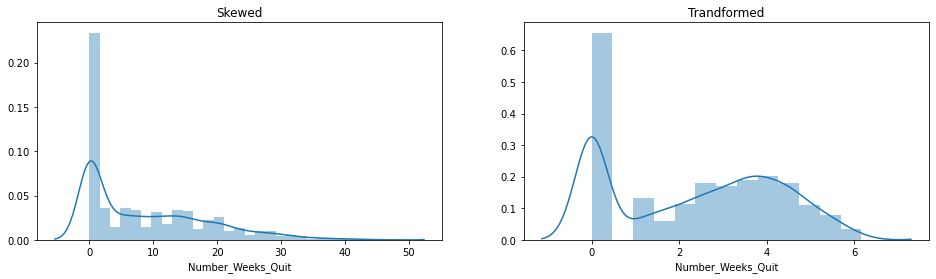

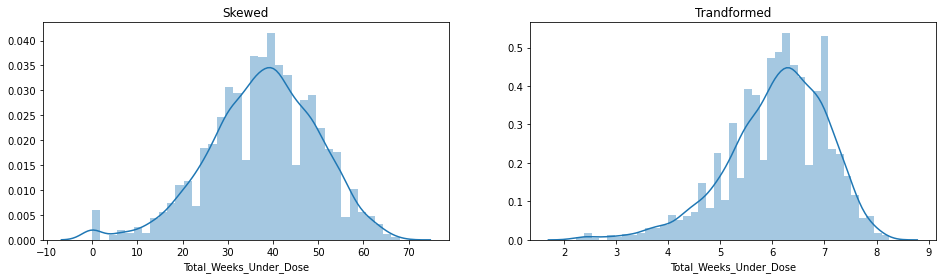

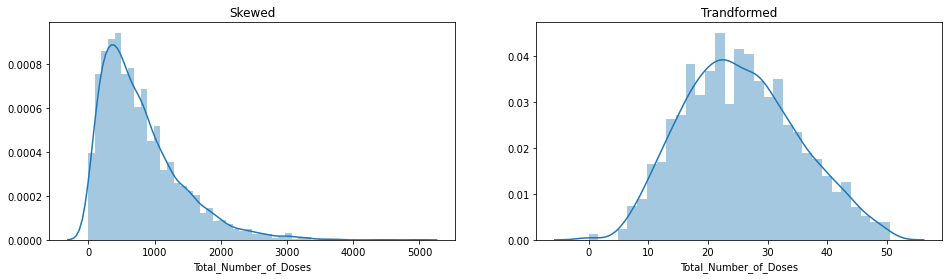

In [689]:
for col in num_feat:
    
    fig = fig_this_size(16,4)
        
    fig.add_subplot(121)
    sns.distplot(df[col])
    plt.title('Skewed')
        
    fig.add_subplot(122)
    sns.distplot(df_cleaned[col])
    plt.title('Trandformed')

* The second columns much better than the first column.

In [704]:
df_cleaned

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Total_Weeks_Under_Dose,Total_Number_of_Doses
5,21.166010,0,1,1,0.000000,6.782330,0.000000,2,1.0,6.000000,41.472883
6,21.166010,0,1,1,0.000000,5.916080,0.000000,2,1.0,6.324555,34.641016
10,34.813790,1,0,1,0.000000,4.582576,0.000000,3,0.0,7.615773,30.822070
17,49.000000,0,1,1,0.000000,3.464102,0.000000,1,1.0,6.324555,15.811388
24,12.247449,0,0,3,5.477226,5.099020,0.000000,2,0.0,5.099020,27.928480
...,...,...,...,...,...,...,...,...,...,...,...
4594,46.238512,0,1,2,4.472136,5.000000,1.000000,1,1.0,6.480741,28.284271
4595,46.249324,0,1,2,5.477226,6.855655,1.414214,1,1.0,7.000000,37.549967
4596,47.613023,0,1,2,3.162278,2.645751,5.196152,2,0.0,5.830952,8.366600
4597,47.613023,0,1,2,3.162278,4.472136,4.898979,2,0.0,6.633250,14.142136


## Feature Variable Split

In [705]:
X = df_cleaned.drop('Crop_Damage',1)
y = df_cleaned['Crop_Damage']

In [706]:
# checking theshape

In [707]:
X.shape,y.shape

((4296, 10), (4296,))

## Train Validation Split

In [708]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.3,random_state=42)

In [709]:
# again the shapes
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((3007, 10), (3007,), (1289, 10), (1289,))

In [710]:
X_train

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Total_Weeks_Under_Dose,Total_Number_of_Doses
1909,38.444766,0,1,2,3.162278,4.123106,5.656854,2,7.000000,13.038405
1352,13.000000,0,1,2,4.472136,4.000000,0.000000,1,4.000000,17.888544
3787,46.249324,0,0,2,6.324555,6.557439,2.828427,2,7.141428,41.472883
3474,31.368774,0,0,2,5.477226,6.082763,1.414214,2,6.244998,33.316662
3450,30.248967,0,0,2,6.324555,5.916080,3.162278,1,6.708204,37.416574
...,...,...,...,...,...,...,...,...,...,...
3696,42.261093,0,0,2,4.472136,4.242641,5.385165,1,6.855655,18.973666
534,32.496154,1,0,3,5.477226,6.403124,0.000000,1,6.403124,35.071356
3333,24.020824,0,0,2,6.324555,5.196152,3.000000,3,6.000000,32.863353
4058,24.020824,0,1,2,6.324555,3.464102,4.242641,2,5.477226,21.908902


## Standard Scaling

In [711]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [712]:
num_feat

['Estimated_Insects_Count',
 'Number_Doses_Week',
 'Number_Weeks_Used',
 'Number_Weeks_Quit',
 'Total_Weeks_Under_Dose',
 'Total_Number_of_Doses']

In [713]:
cat_feat

['Crop_Type', 'Soil_Type', 'Pesticide_Use_Category', 'Season', 'Crop_Damage']

In [714]:
ct = ColumnTransformer(transformers=[('sc',StandardScaler(),num_feat)],remainder='passthrough')

In [715]:
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_val)

In [716]:
# shape check!
X_train.shape,X_test.shape

((3007, 10), (1289, 10))

## Building the model

In [717]:
# importing the training dependencies
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [718]:
# importing the evalation metrics 
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import f1_score,precision_score,recall_score,plot_confusion_matrix,plot_roc_curve,classification_report

In [723]:
# helper funciton
def train_n_ret_scores(model):
    model.fit(X_train,y_train)
    
    print('Train_Acc:', model.score(X_val,y_val))
    print('Test_Acc:', model.score(X_val,y_val))

In [724]:
#try1: Logistic Regression
train_n_ret_scores(LogisticRegression())

Train_Acc: 0.1474010861132661
Test_Acc: 0.1474010861132661


In [725]:
#try2: SVC
train_n_ret_scores(SVC())

Train_Acc: 0.8525989138867339
Test_Acc: 0.8525989138867339


In [726]:
#try3: KNN
train_n_ret_scores(KNeighborsClassifier())

Train_Acc: 0.8448409619860356
Test_Acc: 0.8448409619860356


In [727]:
#try3: KNN
train_n_ret_scores(KNeighborsClassifier())

Train_Acc: 0.8448409619860356
Test_Acc: 0.8448409619860356


In [728]:
#try5: Decision Treaes
train_n_ret_scores(DecisionTreeClassifier())

Train_Acc: 0.8494957331264547
Test_Acc: 0.8494957331264547


In [729]:
#try4: Random Forest
train_n_ret_scores(RandomForestClassifier())

Train_Acc: 0.7626066718386346
Test_Acc: 0.7626066718386346


In [730]:
#try5: Gadient Boosting
train_n_ret_scores(GradientBoostingClassifier())

Train_Acc: 0.8510473235065943
Test_Acc: 0.8510473235065943


In [731]:
#try6: Adaboost
train_n_ret_scores(AdaBoostClassifier())

Train_Acc: 0.8533747090768037
Test_Acc: 0.8533747090768037


In [732]:
#try7: Adaboost with Logistic
train_n_ret_scores(AdaBoostClassifier(base_estimator=LogisticRegression()))

Train_Acc: 0.1474010861132661
Test_Acc: 0.1474010861132661


In [733]:
# Let's create a dataframe with all the models in it

In [734]:
# choosing the best model


models = [LogisticRegression(),SVC(),KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=200),GradientBoostingClassifier(n_estimators=150),AdaBoostClassifier(RandomForestClassifier())]
model_names = 'Logistic_reg SVC KNN Random_forest Decision_Treee Gradient_boost Adaboost'.split()
models_df = pd.DataFrame(columns=['Algo','Train_acc','Test_acc','Avg_CV'])

for (model,model_names) in zip(models,model_names):
    print(model_names)
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_val)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_val,y_val)

    
    avg_cv = np.mean(cross_val_score(model,X_train,y_train))
    
    models_df = models_df.append({'Algo':model_names,'Train_acc':train_acc,'Test_acc':test_acc,'Avg_CV':avg_cv},ignore_index=True)

Logistic_reg
SVC
KNN
Random_forest
Decision_Treee
Gradient_boost
Adaboost


In [735]:
models_df

,Algo,Train_acc,Test_acc,Avg_CV
0,Logistic_reg,0.860991,0.147401,0.859330
1,SVC,0.862986,0.852599,0.862987
2,KNN,0.879282,0.844841,0.845367
3,Random_forest,0.999335,0.849496,0.765880
4,Decision_Treee,0.999335,0.851047,0.854344
5,Gradient_boost,0.896907,0.853375,0.857000
6,Adaboost,0.999335,0.852599,0.858667


* The SVC is giving usthe best cross vaidation score

In [737]:
# let's finalize the SVM as our best model

In [738]:
best_model = SVC()

In [739]:
best_model.fit(X_train,y_train)

SVC()

In [740]:
train_n_ret_scores(best_model)

Train_Acc: 0.8525989138867339
Test_Acc: 0.8525989138867339


## Hyper parameter tunning

In [742]:
from sklearn.model_selection import GridSearchCV

In [743]:
param_dict = {
    'C':[1.0,10,100],
    'kernel':['rbg','linear'],
    'gamma':['scale',0.1,0.01,0.001]
    
}

In [746]:
gs_model = GridSearchCV(best_model,param_grid=param_dict,verbose=2)

In [747]:
gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=1.0, gamma=scale, kernel=rbg ..................................
[CV] ................... C=1.0, gamma=scale, kernel=rbg, total=   0.0s
[CV] C=1.0, gamma=scale, kernel=rbg ..................................
[CV] ................... C=1.0, gamma=scale, kernel=rbg, total=   0.0s
[CV] C=1.0, gamma=scale, kernel=rbg ..................................
[CV] ................... C=1.0, gamma=scale, kernel=rbg, total=   0.0s
[CV] C=1.0, gamma=scale, kernel=rbg ..................................
[CV] ................... C=1.0, gamma=scale, kernel=rbg, total=   0.0s
[CV] C=1.0, gamma=scale, kernel=rbg ..................................
[CV] ................... C=1.0, gamma=scale, kernel=rbg, total=   0.0s
[CV] C=1.0, gamma=scale, kernel=linear ...............................
[CV] ................ C=1.0, gamma=scale, kernel=linear, total=   0.0s
[CV] C=1.0, gamma=scale, kernel=linear ...............................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=1.0, gamma=scale, kernel=linear ...............................
[CV] ................ C=1.0, gamma=scale, kernel=linear, total=   0.0s
[CV] C=1.0, gamma=0.1, kernel=rbg ....................................
[CV] ..................... C=1.0, gamma=0.1, kernel=rbg, total=   0.0s
[CV] C=1.0, gamma=0.1, kernel=rbg ....................................
[CV] ..................... C=1.0, gamma=0.1, kernel=rbg, total=   0.0s
[CV] C=1.0, gamma=0.1, kernel=rbg ....................................
[CV] ..................... C=1.0, gamma=0.1, kernel=rbg, total=   0.0s
[CV] C=1.0, gamma=0.1, kernel=rbg ....................................
[CV] ..................... C=1.0, gamma=0.1, kernel=rbg, total=   0.0s
[CV] C=1.0, gamma=0.1, kernel=rbg ....................................
[CV] ..................... C=1.0, gamma=0.1, kernel=rbg, total=   0.0s
[CV] C=1.0, gamma=0.1, kernel=linear .................................
[CV] .................. C=1.0, gamma=0.1, kernel=linear, total=   0.0s
[CV] 

[CV] .................. C=10, gamma=0.01, kernel=linear, total=   0.1s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] .................. C=10, gamma=0.01, kernel=linear, total=   0.1s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] .................. C=10, gamma=0.01, kernel=linear, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbg ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbg, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbg ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbg, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbg ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbg, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbg ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbg, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbg ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 108.9min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1.0, 10, 100],
                         'gamma': ['scale', 0.1, 0.01, 0.001],
                         'kernel': ['rbg', 'linear']},
             verbose=2)

In [748]:
gs_model.best_params_

{'C': 1.0, 'gamma': 'scale', 'kernel': 'linear'}

In [749]:
gs_model.best_score_

0.8629869376067573

In [750]:
y_preds = gs_model.predict(X_val)

In [758]:
## Prediction on the testing data

In [760]:
test_df

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage,Total_Weeks_Under_Dose,Total_Number_of_Doses
0,188,1,1,1,0,9.0,0,2,NaN,37.0,360.0
1,410,1,1,1,0,0.0,0,2,NaN,0.0,0.0
2,626,1,0,1,0,0.0,0,2,NaN,0.0,0.0
3,731,1,0,1,0,0.0,0,2,NaN,0.0,0.0
4,789,0,0,1,0,0.0,0,1,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1194,1132,0,1,2,40,34.0,7,3,NaN,41.0,1360.0
1195,1132,0,1,2,40,25.0,3,1,NaN,28.0,1000.0
1196,1132,0,1,2,20,13.0,23,1,NaN,36.0,260.0
1197,1212,0,1,2,10,35.0,5,1,NaN,40.0,350.0


In [770]:
pd.DataFrame(best_model.predict(X_test)).to_csv('Test_results.csv')

In [ ]:
# Saving the best model

In [ ]:
import joblib

In [ ]:
joblib.dump(best_model,'Agriculture.pkl')